In [ ]:
!pip install -q transformers datasets scikit-learn matplotlib emoji tqdm sentence-transformers tf-keras

In [12]:
from datasets import load_dataset

dataset = load_dataset(path='JAugusto97/told-br', name='binary', trust_remote_code=True)
print(dataset)

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16800
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2100
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2100
    })
})


In [13]:
n_samples = 500

train_dataset = dataset['train']
test_dataset = dataset['test']


if 0 < n_samples < len(train_dataset):
    train_dataset = train_dataset.select(range(n_samples))

if 0 < n_samples < len(test_dataset):
    test_dataset = test_dataset.select(range(n_samples))

print(f'\nTrain: {len(train_dataset)}')
print(f'Test: {len(test_dataset)}')


Train: 500
Test: 500


In [14]:
train_tweets = train_dataset['text']
train_labels = train_dataset['label']

test_tweets = test_dataset['text']
test_labels = test_dataset['label']

print(f'\nTweet: {train_tweets[7]}')
print(f'\nTweet: {test_labels[7]}')


Tweet: rt @user eu odeio sentir ódio de alguém pq eu tô por trás da porra da tela de um celular e não posso meter o socão na fuça.

Tweet: 0


In [26]:
from sklearn.feature_extraction.text import CountVectorizer, \
TfidfVectorizer

from sentence_transformers import SentenceTransformer

vectorizer_opt = 5

if vectorizer_opt == 1:
  vectorizer = CountVectorizer(binary=True, ngram_range=(1, 1))
elif vectorizer_opt == 2:
  vectorizer = CountVectorizer(binary=False, ngram_range=(1, 1))
elif vectorizer_opt == 3:
  vectorizer = TfidfVectorizer(ngram_range=(1, 1))
elif vectorizer_opt == 4:
  vectorizer = SentenceTransformer(model_name_or_path='neuralmind/bert-base-portuguese-cased')
elif vectorizer_opt == 5:
  vectorizer = SentenceTransformer(model_name_or_path='pablocosta/bertabaporu-base-uncased')

No sentence-transformers model found with name pablocosta/bertabaporu-base-uncased. Creating a new one with mean pooling.


In [27]:
print(vectorizer)

SentenceTransformer(
  (0): Transformer({'max_seq_length': 512, 'do_lower_case': False}) with Transformer model: BertModel 
  (1): Pooling({'word_embedding_dimension': 768, 'pooling_mode_cls_token': False, 'pooling_mode_mean_tokens': True, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False, 'pooling_mode_weightedmean_tokens': False, 'pooling_mode_lasttoken': False, 'include_prompt': True})
)


In [28]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

dict_models = {
    #'Naive Bayes': MultinomialNB(),
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC(),
    'Random Forest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier()
}


In [7]:
!python -m spacy download pt_core_news_sm

/Users/daianeucceli/transformers-course/.env/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 37.7 MB/s eta 0:00:00 0:00:01
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')


In [29]:
import spacy
import emoji
import re

from tqdm import tqdm
from unicodedata import normalize

def preprocess_tweets(list_tweets: list) -> list:

  list_tweets_processed = []

  nlp = spacy.load('pt_core_news_sm', disable=['parser', 'ner'])

  with tqdm(total=len(list_tweets), colour='red', 
                      desc='Processing') as pbar:
    
    for tweet in list_tweets:

      tweet = emoji.demojize(tweet)

      tweet = tweet.replace('_', ' ')

      tweet = re.sub(r'@(\w|\d|_)+', ' ', tweet).strip()

      tweet = normalize('NFKD', tweet).encode('ASCII', 'ignore').decode()

      tweet_doc = nlp(tweet)

      tweet_tokens = [token.lemma_.lower() for token in tweet_doc
                      if not token.is_stop and token.pos_ != 'PUNCT']

      tweet = ' '.join(tweet_tokens).strip()

      list_tweets_processed.append(tweet)

      pbar.update(1)

  return list_tweets_processed


train_tweets = preprocess_tweets(train_tweets)
test_tweets = preprocess_tweets(test_tweets)

Processing: 100%|██████████| 500/500 [00:00<00:00, 549.26it/s]


In [30]:
if vectorizer_opt in [1, 2, 3]:
  vectorizer.fit(train_tweets)
  X_train = vectorizer.transform(train_tweets).toarray()
  X_test = vectorizer.transform(test_tweets).toarray()
  print(f'\nVocabulary: {len(vectorizer.vocabulary_)}')

In [31]:
print(f'\nTweet Original: {train_tweets[0]}')
print(f'\nTweet Vectorized: {X_train[0]}')


Tweet Original: rt      olhar chegouuuuu queridinho direcao star-struck 

   fem girl 10/15 
   masc boy 25/40 

   # qqmt https://t.co/jivoqeuq

Tweet Vectorized: [0 1 0 ... 0 0 0]



Classifier: Logistic Regression
              precision    recall  f1-score   support

           0       0.63      0.79      0.70       276
           1       0.62      0.44      0.51       224

    accuracy                           0.63       500
   macro avg       0.63      0.61      0.61       500
weighted avg       0.63      0.63      0.62       500





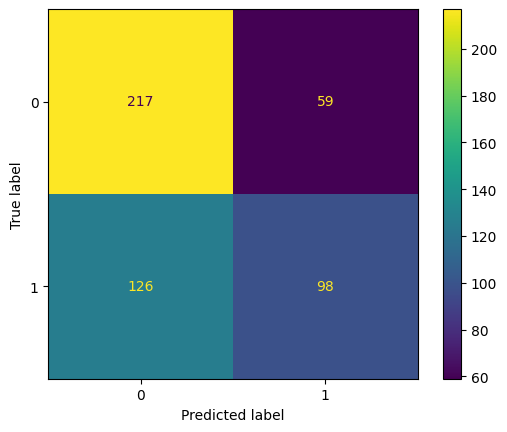


Classifier: SVM
              precision    recall  f1-score   support

           0       0.60      0.93      0.73       276
           1       0.73      0.22      0.34       224

    accuracy                           0.61       500
   macro avg       0.66      0.58      0.53       500
weighted avg       0.66      0.61      0.55       500





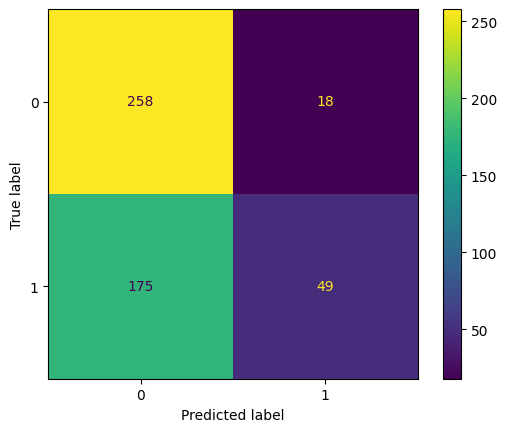


Classifier: Random Forest
              precision    recall  f1-score   support

           0       0.62      0.89      0.73       276
           1       0.72      0.34      0.46       224

    accuracy                           0.64       500
   macro avg       0.67      0.62      0.60       500
weighted avg       0.67      0.64      0.61       500





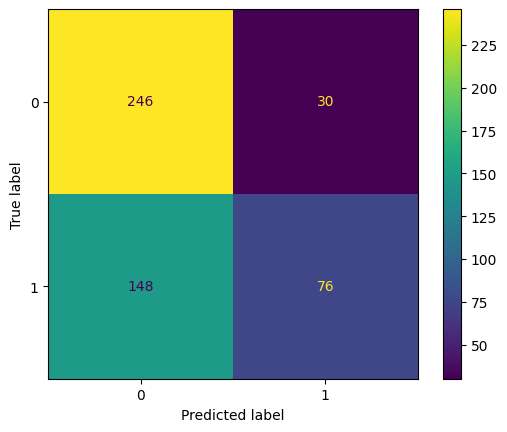


Classifier: KNN
              precision    recall  f1-score   support

           0       0.59      0.78      0.67       276
           1       0.55      0.33      0.42       224

    accuracy                           0.58       500
   macro avg       0.57      0.56      0.54       500
weighted avg       0.57      0.58      0.56       500





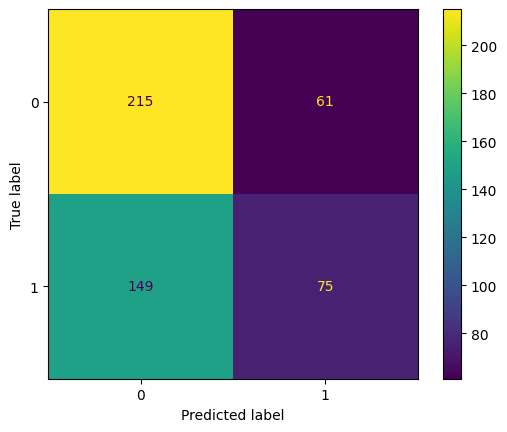

In [32]:
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report, ConfusionMatrixDisplay

for clf_name, clf in dict_models.items():

  print(f'\nClassifier: {clf_name}')

  clf.fit(X_train, train_labels)

  y_pred = clf.predict(X_test)

  report = classification_report(test_labels, y_pred)

  print(f'{report}\n\n')

  ConfusionMatrixDisplay.from_predictions(test_labels, y_pred)

  plt.show()

--------------------------------------------- OUTRO ASSUNTO ---------------------------------------------

In [ ]:
input_text = """Dear Amazon, last week I ordered an Optimus Prime action figure from your online store in Germany. Unfortunately, when I opened the package, I discovered to my horror that I had been sent an action figure of Megatron instead! As a lifelong enemy of the Decepticons, I hope you can understand my dilemma. To resolve the issue, I demand an exchange of Megatron for the Optimus Prime figure I ordered. Enclosed are copies of my records concerning this purchase. I expect to hear from you soon. Sincerely, Bumblebee."""

In [ ]:
import pandas as pd

from transformers import pipeline

ner_pipeline = pipeline(task='ner', aggregation_strategy='simple')

results = ner_pipeline(input_text)

print(pd.DataFrame(results))

No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english and revision 4c53496 (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cuda:0


  entity_group     score           word  start  end
0          ORG  0.879010         Amazon      5   11
1         MISC  0.990859  Optimus Prime     36   49
2          LOC  0.999755        Germany     90   97
3         MISC  0.556569           Mega    208  212
4          PER  0.590257         ##tron    212  216
5          ORG  0.669693         Decept    253  259
6         MISC  0.498349        ##icons    259  264
7         MISC  0.775361       Megatron    350  358
8         MISC  0.987854  Optimus Prime    367  380
9          PER  0.812096      Bumblebee    502  511


In [ ]:
classifier = pipeline(task='text-classification')

results = classifier(input_text)

print(pd.DataFrame(results))

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cuda:0


      label     score
0  NEGATIVE  0.901546


In [ ]:
pipeline_qa = pipeline(task='question-answering',
                       model='deepset/roberta-base-squad2')

question = 'What is the name of the customer?'

results = pipeline_qa(question=question, context=input_text)

print(pd.DataFrame([results]))

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/496M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/79.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/772 [00:00<?, ?B/s]

Device set to use cuda:0


      score  start  end     answer
0  0.585804    502  511  Bumblebee


In [ ]:
summarizer = pipeline(task='summarization')

summary = summarizer(input_text, min_length=10, max_length=20)

print('\nSummary:', summary[0]['summary_text'])

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cuda:0



Summary:  Bumblebee ordered an Optimus Prime action figure from your online store in Germany . Unfortunately


In [ ]:
translator = pipeline(task='translation',
                      model='Helsinki-NLP/opus-mt-tc-big-en-pt')

translation = translator(input_text)

print('\nTranslation PT:', translation[0]['translation_text'])

/usr/local/lib/python3.11/dist-packages/transformers/models/marian/tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")
Device set to use cuda:0



Translation PT Querida Amazon, na semana passada eu pedi uma figura de ação Optimus Prime de sua loja on-line na Alemanha. Infelizmente, quando eu abri o pacote, descobri para o meu horror que eu tinha sido enviado uma figura de ação de Megatron em vez disso! Como um inimigo ao longo da vida dos Decepticons, espero que você possa entender meu dilema. Para resolver o problema, exijo uma troca de Megatron para a figura Optimus Prime que eu pedi. Encerrado são cópias dos meus registros relativos a esta compra em breve.


In [ ]:
response = 'Dear Bumblebee, I am sorry to hear that your order was mixed up.'

prompt = f'{input_text}\n\nCustomer Service Response:\n{response}'

generator = pipeline(task='text-generation')

generated_text = generator(prompt, max_length=200)

print('\n\n', generated_text[0]['generated_text'])

No model was supplied, defaulted to openai-community/gpt2 and revision 607a30d (https://huggingface.co/openai-community/gpt2).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cuda:0
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.




 Dear Amazon, last week I ordered an Optimus Prime action figure from your online store in Germany. Unfortunately, when I opened the package, I discovered to my horror that I had been sent an action figure of Megatron instead! As a lifelong enemy of the Decepticons, I hope you can understand my dilemma. To resolve the issue, I demand an exchange of Megatron for the Optimus Prime figure I ordered. Enclosed are copies of my records concerning this purchase. I expect to hear from you soon. Sincerely, Bumblebee.

Customer Service Response:
Dear Bumblebee, I am sorry to hear that your order was mixed up. I must admit that I had many times considered shipping a box of Optimus Prime to your office. But after reading your post and realizing that I could not ship a box of Optimus Prime to them (and I'm quite confident that I'll be able to do so), I decided to give your offer some thought once again and contact you again
